# Setup

In [69]:
import numpy as np
import os
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense, Flatten, Activation, Conv2D, Dropout, BatchNormalization, MaxPool2D

from keras.callbacks import TensorBoard
from keras.optimizers import Adam

from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers,regularizers
from keras.utils import to_categorical
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import cv2
import shutil

from PIL import Image

# Path

In [104]:
train_path = 'asl-alphabet/asl_alphabet_train/asl_alphabet_train/'
test_path = 'asl-alphabet/asl_alphabet_test/asl_alphabet_test/'

This quick way for me to label all my classes

In [105]:
CATEGORIES = []

for i in range(0,26):
    CATEGORIES.append(chr(ord('A') + i))

CATEGORIES.append('space')
CATEGORIES.append('nothing')
CATEGORIES.append('del')

# Preprocessing Data

In [113]:
generator = ImageDataGenerator(validation_split=0.2)
generator1 = ImageDataGenerator(validation_split=0.2)
train_batches = generator.flow_from_directory(train_path,
                                              target_size=(64,64),
                                              classes = CATEGORIES,
                                              color_mode='rgb',
                                              batch_size=30,
                                              subset='training')
valid_batches = generator1.flow_from_directory(train_path,
                                              target_size=(64,64),
                                              classes = CATEGORIES,
                                              color_mode='rgb',
                                              batch_size=10,
                                              subset= 'validation')


Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [88]:
test_labels = []
test_images = []
width = 64.0
height = 64.0
for name in os.listdir(test_path):
    temp_test_labels = [0 for i in range(29)]
    if name[-3:] == 'jpg':
        category, _ = name.split('_')
        temp_test_labels[train_batches.class_indices[category]] = 1
        test_labels.append(temp_test_labels)
        with Image.open(test_path + name) as image:
            width,height = image.size
        
            test_images.append(np.array(image)/ 255.0)
        
       
        
    
        
    

In [89]:
test_labels

[[0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,

[[0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,

In [117]:
images, labels = next(train_batches)


In [100]:
images[1]

array([[[0.03137255, 0.00784314, 0.9176471 ],
        [0.01960784, 0.04313726, 0.7254902 ],
        [0.04705883, 0.03137255, 0.7411765 ],
        ...,
        [0.07843138, 0.03529412, 0.7411765 ],
        [0.00392157, 0.02352941, 0.7294118 ],
        [0.03921569, 0.03529412, 0.8117648 ]],

       [[0.04313726, 0.02745098, 0.7137255 ],
        [0.5686275 , 0.4901961 , 0.28235295],
        [0.52156866, 0.4666667 , 0.36078432],
        ...,
        [0.5137255 , 0.427451  , 0.23529413],
        [0.5019608 , 0.3921569 , 0.29803923],
        [0.48627454, 0.41960788, 0.59607846]],

       [[0.01176471, 0.03921569, 0.7019608 ],
        [0.73333335, 0.65882355, 0.53333336],
        [0.7725491 , 0.7411765 , 0.59607846],
        ...,
        [0.58431375, 0.5058824 , 0.41176474],
        [0.627451  , 0.5019608 , 0.4039216 ],
        [0.5568628 , 0.49411768, 0.7372549 ]],

       ...,

       [[0.03137255, 0.04313726, 0.72156864],
        [0.34901962, 0.33333334, 0.18823531],
        [0.34509805, 0

array([[[0.03137255, 0.00784314, 0.9176471 ],
        [0.01960784, 0.04313726, 0.7254902 ],
        [0.04705883, 0.03137255, 0.7411765 ],
        ...,
        [0.07843138, 0.03529412, 0.7411765 ],
        [0.00392157, 0.02352941, 0.7294118 ],
        [0.03921569, 0.03529412, 0.8117648 ]],

       [[0.04313726, 0.02745098, 0.7137255 ],
        [0.5686275 , 0.4901961 , 0.28235295],
        [0.52156866, 0.4666667 , 0.36078432],
        ...,
        [0.5137255 , 0.427451  , 0.23529413],
        [0.5019608 , 0.3921569 , 0.29803923],
        [0.48627454, 0.41960788, 0.59607846]],

       [[0.01176471, 0.03921569, 0.7019608 ],
        [0.73333335, 0.65882355, 0.53333336],
        [0.7725491 , 0.7411765 , 0.59607846],
        ...,
        [0.58431375, 0.5058824 , 0.41176474],
        [0.627451  , 0.5019608 , 0.4039216 ],
        [0.5568628 , 0.49411768, 0.7372549 ]],

       ...,

       [[0.03137255, 0.04313726, 0.72156864],
        [0.34901962, 0.33333334, 0.18823531],
        [0.34509805, 0

In [18]:
labels

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0

In [114]:
def plot_images(images):
    for i in range(5):
        plt.imshow((images[i]).astype(np.uint8))
        plt.title(CATEGORIES[int(np.where(labels[i] == 1)[0])])
        plt.show()

# Plotting Images

Can verify labels are correct with provided chart

In [115]:
%%html
<img src="RefImg.jpg" alt="ASL-Alphabet">

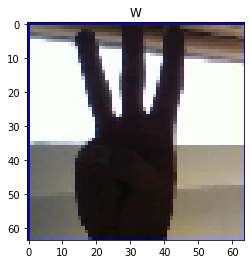

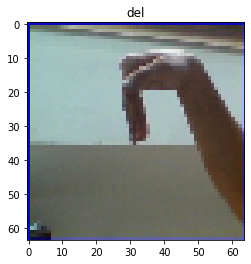

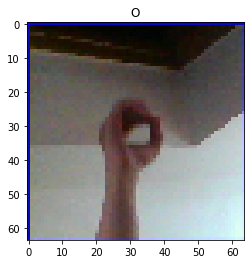

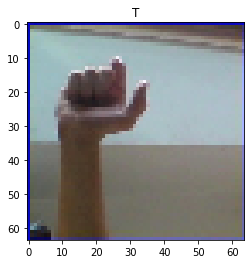

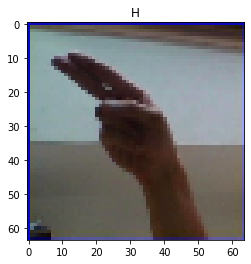

In [118]:
plot_images(images)

# Build Model

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=4, strides=1, activation='relu', input_shape=(64,64,3)))

model.add(Conv2D(64, kernel_size=4, strides=2, activation='relu'))
#model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size=4, strides=1, activation='relu'))
model.add(Conv2D(128, kernel_size=4, strides=2, activation='relu'))
#model.add(Dropout(0.5))

model.add(Conv2D(256, kernel_size=4, strides=1, activation='relu'))
model.add(Conv2D(256, kernel_size=4, strides=2, activation='relu'))

model.add(BatchNormalization())

model.add(Flatten())
#model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer = regularizers.l2(0.001)))
model.add(Dense(29, activation='softmax'))

In [ ]:
model.compile(optimizer= 'sgd', loss= "categorical_crossentropy", metrics=['accuracy'])

In [ ]:
model.fit_generator(train_batches,
                    steps_per_epoch=30,
                    validation_data=valid_batches,
                    validation_steps=10,
                    epochs=10,
                    verbose=2)

vgg16_model = keras.applications.vgg16.VGG16()


In [65]:
vgg16_model = keras.applications.vgg16.VGG16(weights='imagenet',
            include_top=False,
            input_shape=(64, 64, 3))



In [119]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [76]:
model = Sequential()



# Modify Model


In [77]:
#removing last layer and add mine

model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(29, activation='softmax'))

In [83]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               409800    
_________________________________________________________________
dense_5 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_6 (Dense)              (None, 29)                5829      
Total params: 15,170,517
Trainable params: 15,170,517
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)        

In [79]:
model.compile(optimizer= 'sgd', loss= "categorical_crossentropy", metrics=['accuracy'])

In [80]:
model.fit_generator(train_batches,
                    steps_per_epoch=30,
                    validation_data=valid_batches,
                    validation_steps=10,
                    epochs=10,
                    verbose=2)

Epoch 1/10
Epoch 1/10
 - 28s - loss: 3.2650 - accuracy: 0.1156 - val_loss: 2.5985 - val_accuracy: 0.1400
 - 28s - loss: 3.2650 - accuracy: 0.1156 - val_loss: 2.5985 - val_accuracy: 0.1400
Epoch 2/10
Epoch 2/10
 - 27s - loss: 2.9206 - accuracy: 0.1944 - val_loss: 2.9636 - val_accuracy: 0.1900
 - 27s - loss: 2.9206 - accuracy: 0.1944 - val_loss: 2.9636 - val_accuracy: 0.1900
Epoch 3/10
Epoch 3/10
 - 30s - loss: 2.1683 - accuracy: 0.3811 - val_loss: 2.1654 - val_accuracy: 0.3500
 - 30s - loss: 2.1683 - accuracy: 0.3811 - val_loss: 2.1654 - val_accuracy: 0.3500
Epoch 4/10
Epoch 4/10
 - 38s - loss: 1.5166 - accuracy: 0.5933 - val_loss: 2.1013 - val_accuracy: 0.4900
 - 38s - loss: 1.5166 - accuracy: 0.5933 - val_loss: 2.1013 - val_accuracy: 0.4900
Epoch 5/10
Epoch 5/10
 - 35s - loss: 1.3247 - accuracy: 0.6200 - val_loss: 1.6140 - val_accuracy: 0.6100
 - 35s - loss: 1.3247 - accuracy: 0.6200 - val_loss: 1.6140 - val_accuracy: 0.6100
Epoch 6/10
Epoch 6/10
 - 34s - loss: 0.7990 - accuracy: 0.77

In [91]:
model.evaluate(test_images[0],test_labels[0])

ValueError: Error when checking input: expected vgg16_input to have 4 dimensions, but got array with shape (200, 200, 3)

ValueError: Error when checking input: expected vgg16_input to have 4 dimensions, but got array with shape (200, 200, 3)

In [ ]:
pip install h5py

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

In [ ]:
scores = model.evaluate(images, labels, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))